In [110]:
import diffusers
import torch
import sys
sys.path.append("../")
from DDPMPipelineDropout import DDPMPipeline

import utils

In [6]:
model_path = "ddpm-ffhq-128/DDPM-FFHQ-TEST_v1_nodp.pth"
experiment_name = "10D-10S-ne"
model, config = utils.load_model(model_path)
scheduler = diffusers.DDPMScheduler(num_train_timesteps=config.num_train_timestamps)
pipeline = DDPMPipeline(unet=model, scheduler=scheduler).to("cuda")

Loading failed, Trying to Load data parallel mode


In [ ]:
# vit model
class NeighBERT(nn.Module):
    def __init__(self, size, features_dim, out_size, pretrained=False, freeze_pos_embed=False, **kwargs):
        super(vit_model, self).__init__()
        
        if freeze_pos_embed:
            pass
        else:
            if size=="base":
                model_kwargs = dict(
                    patch_size=16, embed_dim=768, depth=12, num_heads=12, num_classes=0, **kwargs
                )
                self.backbone = _create_vision_transformer("vit_base_patch16_224", pretrained=pretrained, **model_kwargs)
            else:
                pass

        self.classifier = nn.Sequential(
            nn.Linear(features_dim, out_size),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.backbone(x)
        x = self.classifier(x)
        return x

In [ ]:
def load_model(load_path, model):
    load_path = load_path
    checkpoint = torch.load(load_path)
    state_dict = {k.replace("img_backbone.", "module."): v for k, v in checkpoint['state_dict'].items()}
    model_state = model.load_state_dict(state_dict, strict=False)
    print(model_state)

In [ ]:
#Set Eval params here
config.bayesian_avg_range = (0, 1000)
config.bayesian_avg_samples = 1
config.__dict__

In [ ]:
fid_score, inception_score = utils.calculate_metrics(config, pipeline, batch_size=1, num_images=2)

In [ ]:
try :
    results = torch.load("../results.dict")
except:
    results = {}

if experiment_name in results:
    results[experiment_name]["fid_score"] = fid_score.item()
    results[experiment_name]["path"] = model_path
    results[experiment_name]["inception_score_mean"] = inception_score[0].item()
    results[experiment_name]["inception_score_std"] = inception_score[1].item()
    results[experiment_name]["config"] = config.__dict__
else:
    results[experiment_name] = {}
    results[experiment_name]["fid_score"] = fid_score.item()
    results[experiment_name]["path"] = model_path
    results[experiment_name]["inception_score_mean"] = inception_score[0].item()
    results[experiment_name]["inception_score_std"] = inception_score[1].item()
    results[experiment_name]["config"] = config.__dict__

torch.save(results, "../results.dict")

In [ ]:
config.eval_batch_size = 4
utils.ddpm_evaluate(config, 0, pipeline)

In [7]:
config.run_name

'DDPM-FFHQ-TEST_v1_nodp'

# DDIM

In [100]:
results = torch.load("../results_ddim_lsun.dict")

In [101]:
results.keys()

dict_keys(['LSUN_0.2dp_0-1000', 'lsun_0.05dp_0-1000', 'LSUN_0.1dp_0-250', 'LSUN_0.05dp_0-250', 'LSUN_0.05dp_0-1000', 'LSUN_0.2dp_0-250', 'LSUN_0.1dp_0-1000', 'LSUN_0.05dp_0-500', 'LSUN_0.2dp_0-500', 'LSUN_0.1dp_0-500', 'LSUN_0.2dp_0-250_s20', 'LSUN_0.05dp_0-250_s20', 'LSUN_0.05dp_0-750', 'LSUN_0.1dp_0-250_s20', 'LSUN_0.1dp_0-750', 'LSUN_0.2dp_0-750', 'LSUN_0.1dp_0-1000_s1', 'LSUN_0.05dp_0-1000_s1', 'LSUN_nodp_0-1000_s1', 'LSUN_0.2dp_0-1000_s1'])

In [109]:
results['LSUN_0.05dp_0-250_s20']

{'fid_score': 24.682498931884766,
 'path': '/gpfs/data/denizlab/Users/hh2740/bml_atharv/BMLProject/ddim-lsun-32_0.05dp/DDIM-LSUN-TEST_v1_0.05dp.pth',
 'inception_score_mean': 2.311143159866333,
 'inception_score_std': 0.14349831640720367,
 'config': {'run_name': 'DDIM-LSUN-TEST_v1_0.05dp',
  'num_inference_steps': 100,
  'dataset': 'LSUN_CHURCH',
  'image_size': 64,
  'train_batch_size': 32,
  'eval_batch_size': 16,
  'num_epochs': 500,
  'gradient_accumulation_steps': 1,
  'learning_rate': 0.0002,
  'lr_warmup_steps': 500,
  'save_image_epochs': 10,
  'save_model_epochs': 10,
  'mixed_precision': 'fp16',
  'output_dir': 'ddim-lsun-32_0.05dp',
  'overwrite_output_dir': True,
  'seed': 0,
  'down_dropout': 0.05,
  'mid_dropout': 0.05,
  'up_dropout': 0.05,
  'bayesian_avg_samples': 20,
  'bayesian_avg_range': (0, 250)}}

In [40]:
std_1 = results["LSUN_0.05dp_0-1000"]["diffusion_std"]
std_2 = results["LSUN_0.1dp_0-1000"]["diffusion_std"]
std_3 = results["LSUN_0.2dp_0-1000"]["diffusion_std"]

In [41]:
#results['LSUN_0.1dp_0-1000']

In [42]:
results.keys()

dict_keys(['LSUN_0.2dp_0-1000', 'lsun_0.05dp_0-1000', 'LSUN_0.1dp_0-250', 'LSUN_0.05dp_0-250', 'LSUN_0.05dp_0-1000', 'LSUN_0.2dp_0-250', 'LSUN_0.1dp_0-1000'])

In [43]:
x = list(range(0, 100))

In [44]:
reversed_list = list()

for item in x:
    reversed_list = [item] + reversed_list

In [45]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [46]:
#std_1 = list(std_1).reverse()

In [49]:
#x = np.arange(0, 100, 1)

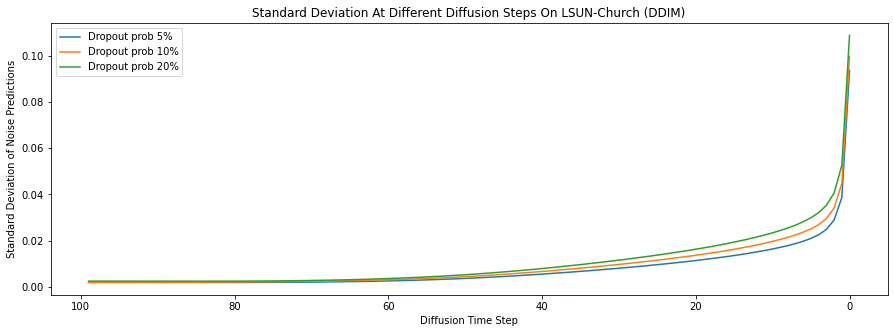

In [48]:
# plot lines
figure(figsize=(15, 5))
plt.plot(reversed_list, std_1, label = "Dropout prob 5%")
plt.plot(reversed_list, std_2, label = "Dropout prob 10%")
plt.plot(reversed_list, std_3, label = "Dropout prob 20%")
plt.gca().invert_xaxis()
plt.title(label = "Standard Deviation At Different Diffusion Steps On LSUN-Church (DDIM)")
plt.xlabel("Diffusion Time Step")
plt.ylabel("Standard Deviation of Noise Predictions")
plt.legend()
plt.show()

# DDPM

In [111]:
import torch

In [112]:
results = torch.load("../results_ddpm_lsun.dict")

In [113]:
results.keys()

dict_keys(['LSUN_nodp_0-1000', 'lsun_0.05dp_0-1000', 'LSUN_0.2dp_0-250', 'LSUN_0.1dp_0-250', 'LSUN_0.05dp_0-250', 'LSUN_0.2dp_0-1000', 'LSUN_0.1dp_0-1000', 'LSUN_0.05dp_0-500', 'LSUN_0.1dp_0-500', 'LSUN_0.1dp_0-250_s20', 'LSUN_0.05dp_0-250_s20', 'LSUN_0.2dp_0-500', 'LSUN_0.1dp_0-750', 'LSUN_0.2dp_0-250_s20', 'LSUN_0.1dp_0-1000_s1', 'LSUN_0.2dp_0-1000_s1', 'LSUN_0.2dp_0-750', 'LSUN_0.05dp_0-750', 'LSUN_0.05dp_0-1000_s1', 'LSUN_0.1dp_0-250_s5'])

In [114]:
results["LSUN_0.2dp_0-250_s5"]

KeyError: 'LSUN_0.2dp_0-250_s5'

In [26]:
std_1 = results["lsun_0.05dp_0-1000"]["diffusion_std"]
std_2 = results["LSUN_0.1dp_0-1000"]["diffusion_std"]
std_3 = results["LSUN_0.2dp_0-1000"]["diffusion_std"]

In [27]:
#results['LSUN_0.1dp_0-1000']

In [28]:
results.keys()

dict_keys(['LSUN_nodp_0-1000', 'lsun_0.05dp_0-1000', 'LSUN_0.2dp_0-250', 'LSUN_0.1dp_0-250', 'LSUN_0.05dp_0-250', 'LSUN_0.2dp_0-1000', 'LSUN_0.1dp_0-1000'])

In [29]:
x = list(range(0, 1000))

In [30]:
reversed_list = list()

for item in x:
    reversed_list = [item] + reversed_list

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [32]:
#std_1 = list(std_1).reverse()

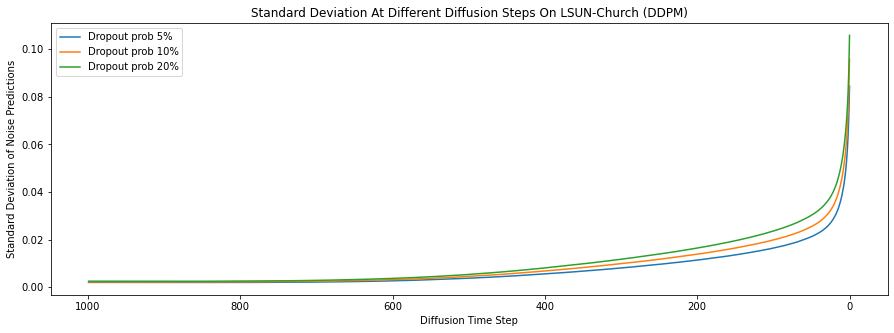

In [35]:
# plot lines
figure(figsize=(15, 5))
plt.plot(reversed_list, std_1, label = "Dropout prob 5%")
plt.plot(reversed_list, std_2, label = "Dropout prob 10%")
plt.plot(reversed_list, std_3, label = "Dropout prob 20%")
plt.gca().invert_xaxis()
plt.title(label = "Standard Deviation At Different Diffusion Steps On LSUN-Church (DDPM)")
plt.xlabel("Diffusion Time Step")
plt.ylabel("Standard Deviation of Noise Predictions")
plt.legend()
plt.show()